# tf records decoding

# imports

In [1]:
import sys  
sys.path.insert(0, './TIES-2.0/python')

import tensorflow as tf
from readers.image_words_reader import ImageWordsReader
import matplotlib.pyplot as plt

# configs

In [2]:
%run TIES-2.0/python/readers/image_words_reader.py
%run TIES-2.0/python/libs/configuration_manager.py

In [3]:
import configparser as cp

config_manager_instance = "none"


class ConfigurationManager:
    def __init__(self, config_file_path, config_name):
        config_file = cp.ConfigParser()
        config_file.read(config_file_path)
        self.config = config_file[config_name]

    @staticmethod
    def init(config_file_path, config_name):
        global config_manager_instance
        if config_manager_instance!="none":
            raise Exception("Config manager already initialized")
        config_manager_instance = ConfigurationManager(config_file_path, config_name)

    @staticmethod
    def get_config_param(key, type="str"):
        global config_manager_instance
        if config_manager_instance=="none":
            raise Exception("Config manager not initialized")

        return_value = None
        if type=="str":
            return_value = str(config_manager_instance.config[key])
        elif type=="float":
            return_value = float(config_manager_instance.config[key])
        elif type=="int":
            return_value = int(config_manager_instance.config[key])
        elif type=="bool":
            return_value = False
            if config_manager_instance.config[key] == "true":
                return_value = True
            elif config_manager_instance.config[key] == "True":
                return_value = True
            elif config_manager_instance.config[key] == "1":
                return_value = True
            elif config_manager_instance.config[key] == "0":
                return_value = False
            elif config_manager_instance.config[key] == "false":
                return_value = False
            elif config_manager_instance.config[key] == "False":
                return_value = False
            else:
                raise ValueError("Unknown bool format")

        else:
            raise Exception("Unknown config type")

        return return_value

    @staticmethod
    def set_config_param(key, value):
        global config_manager_instance
        if config_manager_instance=="none":
            raise Exception("Config manager not initialized")

        config_manager_instance.config[key] = value


In [4]:
config_file_path = './TIES-2.0/configs/config.ini'
config_name = 'basic_conv_graph'
gconfig = ConfigurationManager(config_file_path, config_name)
config_manager_instance = gconfig

In [5]:
max_vertices = gconfig.get_config_param("max_vertices", "int")
num_vertex_features = gconfig.get_config_param("num_vertex_features", "int")
image_height = gconfig.get_config_param("max_image_height", "int")
image_width = gconfig.get_config_param("max_image_width", "int")
max_words_len = gconfig.get_config_param("max_words_len", "int")
num_batch = gconfig.get_config_param("batch_size", "int")
num_global_features = gconfig.get_config_param("num_global_features", "int")
image_channels = gconfig.get_config_param("image_channels", "int")
dim_vertex_x_position = gconfig.get_config_param("dim_vertex_x_position", "int")
dim_vertex_y_position = gconfig.get_config_param("dim_vertex_y_position", "int")
dim_vertex_x2_position = gconfig.get_config_param("dim_vertex_x2_position", "int")
dim_vertex_y2_position = gconfig.get_config_param("dim_vertex_y2_position", "int")

dim_num_vertices = gconfig.get_config_param("dim_num_vertices", "int")
samples_per_vertex = gconfig.get_config_param("samples_per_vertex", "int")
variable_scope = gconfig.get_config_param("variable_scope", "str")
training_files_list = gconfig.get_config_param("training_files_list", "str")
validation_files_list = gconfig.get_config_param("test_files_list", "str")
test_files_list = gconfig.get_config_param("validation_files_list", "str")
learning_rate = gconfig.get_config_param("learning_rate", "float")

is_sampling_balanced = gconfig.get_config_param("is_sampling_balanced", "bool")

visual_feedback_out_path = gconfig.get_config_param("visual_feedback_out_path", type="str")
test_output_path = gconfig.get_config_param("test_out_path", type="str")

## Exploring data

In [6]:
training_reader = ImageWordsReader(training_files_list, num_global_features,
                                            max_vertices, num_vertex_features,
                                            image_height, image_width, image_channels,
                                            max_words_len, num_batch)

#vertex_features, image, global_features, adj_cells, adj_rows, adj_cols
training_feeds = training_reader.get_feeds()

In [7]:
vertex_features, image, global_features, adj_cells, adj_rows, adj_cols = training_feeds

In [8]:
with tf.Session() as sess:
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    adj_cells_eval = adj_cells.eval()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
adj_cells_eval.shape

(30, 900, 900)

In [10]:
with tf.Session() as sess:
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    global_features_eval = global_features.eval()

In [11]:
global_features_eval.shape

(30, 4)

In [13]:
global_features_eval[0]

array([ 768., 1366.,   54.,    2.], dtype=float32)

In [15]:
with tf.Session() as sess:
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    image_eval = image.eval()

In [16]:
image_eval[:,:,:,0][0].shape

(768, 1366)

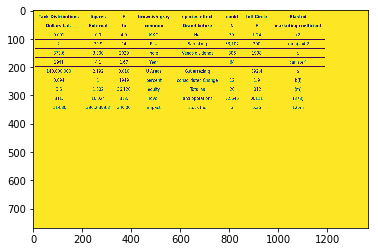

In [17]:
plt.imshow(image_eval[:,:,:,0][0], aspect="auto")